 # **Classification in Machine Learning: Complete Guide**  
*(From Basics to Evaluation Metrics)*  

---

## **1. What is Classification?**  
**Definition:** A supervised learning task where the model predicts **discrete class labels** (categories) instead of continuous values.  

### **Real-World Examples**  
| Problem               | Classes                  |
|-----------------------|--------------------------|
| Email Filtering       | Spam / Not Spam          |
| Medical Diagnosis     | Sick / Healthy           |
| Image Recognition     | Cat / Dog / Bird         |
| Fraud Detection       | Fraudulent / Genuine     |

---

## **2. Types of Classification**  

### **A. Binary Classification**  
- Only **two possible classes**  
- Example: "Will this loan applicant default?" (Yes/No)  

### **B. Multi-Class Classification**  
- **More than two classes** (mutually exclusive)  
- Example: "Which animal is in this image?" (Cat/Dog/Horse)  

### **C. Multi-Label Classification**  
- **Multiple labels per input** (non-exclusive)  
- Example: "What objects are in this image?" (Car, Person, Traffic Light)  

---

## **3. Key Classification Algorithms**  

| Algorithm          | Best For                          | Key Feature                     |
|--------------------|-----------------------------------|---------------------------------|
| **Logistic Regression** | Binary classification            | Probabilistic output            |
| **Decision Trees** | Non-linear relationships         | Easy to interpret               |
| **Random Forest**  | High accuracy                    | Ensemble of trees               |
| **SVM**            | Small-to-medium datasets         | Effective in high dimensions    |
| **Neural Networks**| Complex patterns (images/text)   | Requires large data             |

---

## **4. Classification Workflow (Python Example)**  

### **Step 1: Load Dataset (Iris Flowers)**  
```python
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X, y = iris.data, iris.target  # Features (sepal/petal measurements), Target (flower species)

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
```

### **Step 2: Train a Classifier (Random Forest)**  
```python
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
```

### **Step 3: Evaluate Performance**  
```python
from sklearn.metrics import accuracy_score, classification_report

# Predict on test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Detailed report
print(classification_report(y_test, y_pred, target_names=iris.target_names))
```
**Output:**  
```
Accuracy: 1.00
              precision  recall  f1-score  support
      setosa       1.00    1.00      1.00        10
  versicolor       1.00    1.00      1.00         9
   virginica       1.00    1.00      1.00        11
```

---

## **5. Evaluation Metrics**  

### **A. Confusion Matrix**  
|                | Predicted: No | Predicted: Yes |
|----------------|---------------|----------------|
| **Actual: No**  | True Negative (TN) | False Positive (FP) |
| **Actual: Yes** | False Negative (FN) | True Positive (TP) |

### **B. Key Metrics**  
- **Accuracy**: `(TP + TN) / Total` → Best for balanced classes  
- **Precision**: `TP / (TP + FP)` → "How many selected are correct?"  
- **Recall**: `TP / (TP + FN)` → "How many positives were caught?"  
- **F1-Score**: `2 * (Precision * Recall) / (Precision + Recall)` → Balance of both  

### **C. ROC Curve & AUC**  
- **ROC Curve**: Plots True Positive Rate (Recall) vs. False Positive Rate  
- **AUC**: Area Under Curve (1 = perfect, 0.5 = random guessing)  

---

## **6. Common Interview Questions**  

### **Q1: Why not use accuracy for imbalanced datasets?**  
**A1:** Accuracy is misleading if 99% of data is class "A". Use **F1-score** or **Precision-Recall curves** instead.  

### **Q2: How to handle multi-class classification?**  
**A2:**  
- **One-vs-Rest (OvR)**: Train N binary classifiers (1 per class)  
- **Softmax Regression**: Directly outputs class probabilities  

### **Q3: What’s the difference between generative and discriminative classifiers?**  
**A3:**  
- **Generative (e.g., Naive Bayes)**: Models joint distribution `P(X,y)`  
- **Discriminative (e.g., Logistic Regression)**: Models `P(y|X)` directly  

---

## **7. When to Use Classification?**  
✅ **Good for:**  
- Categorical outcomes (yes/no, types, labels)  
- Problems with clear decision boundaries  

❌ **Avoid when:**  
- Output is continuous (use regression)  
- Data is unlabeled (use clustering)  

---


# **Logistic Regression Explained**  
*(From Intuition to Implementation)*  

---

## **1. What is Logistic Regression?**  
A **classification algorithm** that predicts **probabilities** (between 0 and 1) for binary outcomes using the **sigmoid function**.  

### **Key Characteristics**  
- Outputs a **probability** (e.g., "80% chance of spam")  
- Uses the **logistic function** (sigmoid) to map linear predictions to [0,1]  
- Works for **binary classification** (extendable to multi-class via One-vs-Rest)  

---

## **2. Why Not Linear Regression?**  
- Linear regression predicts continuous values (can go beyond 0/1)  
- Logistic regression squeezes outputs into probabilities using the **sigmoid**:  
  \[
  \sigma(z) = \frac{1}{1 + e^{-z}}
  \]  
  Where \( z = \beta_0 + \beta_1 X \).  

### **Sigmoid Curve Visualization**  
```
Probability (y)
1.0 |        ********
    |      **
    |    **
0.5 |   *
    | **
    |**
0.0 +---------------
      -∞    z    +∞
```
- Maps any real number to [0,1]  
- At \( z=0 \), \( \sigma(z) = 0.5 \) (decision boundary)  

---

## **3. The Math Behind It** 
### **Logistic Regression Equation**

The probability that the output `y` is 1 is modeled as:

**P(y = 1) = 1 / (1 + exp(-(β₀ + β₁X)))**

- This is the **sigmoid function**, which maps any real-valued number into the range (0, 1).
- `β₀`: Intercept (bias term)  
- `β₁`: Coefficient for feature `X`

---

### **Cost Function: Cross-Entropy Loss**

The cost function used in logistic regression is called **cross-entropy loss**:

**J(β) = -(1/n) × Σ [ yᵢ × log(ŷᵢ) + (1 - yᵢ) × log(1 - ŷᵢ) ]**

Where:
- `n`: Number of training examples  
- `yᵢ`: Actual label (0 or 1)  
- `ŷᵢ`: Predicted probability of class 1

> 🔍 This loss function **penalizes confident incorrect predictions** more heavily than less confident ones, encouraging the model to be accurate but not overconfident.


---

## **4. Python Example: Spam Detection**  

### **Step 1: Prepare Data**  
```python  
from sklearn.datasets import make_classification  
from sklearn.model_selection import train_test_split  

# Generate synthetic binary data  
X, y = make_classification(n_samples=1000, n_features=2, n_classes=2, random_state=42)  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)  
```  

### **Step 2: Train Logistic Regression**  
```python  
from sklearn.linear_model import LogisticRegression  

model = LogisticRegression()  
model.fit(X_train, y_train)  

# Coefficients  
print(f"Intercept (β₀): {model.intercept_[0]:.2f}")  
print(f"Coefficients (β₁, β₂): {model.coef_[0]}")  
```  
**Output:**  
```
Intercept (β₀): -0.12  
Coefficients (β₁, β₂): [1.45 -0.89]  
```

### **Step 3: Predict & Evaluate**  
```python  
from sklearn.metrics import accuracy_score, confusion_matrix  

y_pred = model.predict(X_test)  
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")  
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))  
```  
**Output:**  
```
Accuracy: 0.95  
Confusion Matrix:  
[[142   8]  
 [  7 143]]  
```

---

## **5. Decision Boundary Visualization**  
```python  
import numpy as np  
import matplotlib.pyplot as plt  

# Plot data points  
plt.scatter(X[:,0], X[:,1], c=y, cmap='bwr', alpha=0.6)  

# Create decision boundary  
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1  
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1  
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))  
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)  

# Plot boundary  
plt.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')  
plt.title("Logistic Regression Decision Boundary")  
plt.show()  
```  

---

## **6. Key Interview Questions**  

### **Q1: Why use cross-entropy instead of MSE for logistic regression?**  
**A1:**  
- MSE assumes Gaussian errors (bad for probabilities)  
- Cross-entropy penalizes wrong classifications **exponentially**  

### **Q2: How to handle multiclass problems?**  
**A2:**  
- **One-vs-Rest (OvR)**: Train N binary classifiers  
- **Softmax Regression**: Generalizes sigmoid for K classes  

### **Q3: What if features are correlated?**  
**A3:**  
- Use **L2 regularization** (default in `sklearn`) to prevent overfitting  
- Or apply **VIF analysis** to remove redundant features  

---

## **7. Pros & Cons**  

| **Pros**                          | **Cons**                          |  
|-----------------------------------|-----------------------------------|  
| Outputs interpretable probabilities | Limited to linear decision boundaries |  
| Fast to train                     | Requires feature scaling          |  
| Works well with small datasets    | Struggles with non-linear data    |  

---


In [2]:
## **4. Python Example: Spam Detection**  

### **Step 1: Prepare Data**  
from sklearn.datasets import make_classification  
from sklearn.model_selection import train_test_split  

# Generate synthetic binary data  
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_classes=2, random_state=42)  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)  

### **Step 2: Train Logistic Regression**  
from sklearn.linear_model import LogisticRegression  

model = LogisticRegression()  
model.fit(X_train, y_train)  

# Coefficients  
print(f"Intercept (β₀): {model.intercept_[0]:.2f}")  
print(f"Coefficients (β₁, β₂): {model.coef_[0]}")  

Intercept (β₀): 0.26
Coefficients (β₁, β₂): [-0.2777251   2.10894261]


In [3]:
from sklearn.metrics import accuracy_score, confusion_matrix  

y_pred = model.predict(X_test)  
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")  
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))  

Accuracy: 0.86
Confusion Matrix:
 [[122  23]
 [ 19 136]]


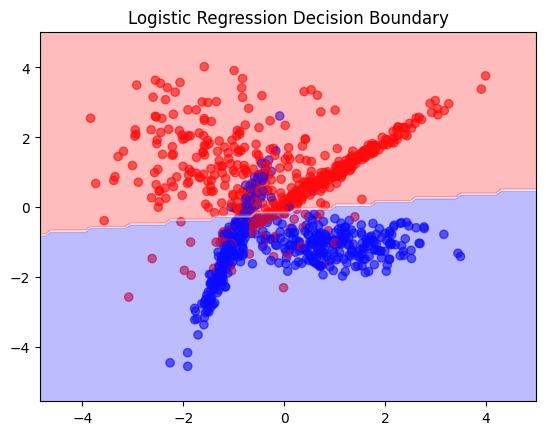

In [4]:
import numpy as np  
import matplotlib.pyplot as plt  

# Plot data points  
plt.scatter(X[:,0], X[:,1], c=y, cmap='bwr', alpha=0.6)  

# Create decision boundary  
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1  
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1  
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))  
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)  

# Plot boundary  
plt.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')  
plt.title("Logistic Regression Decision Boundary")  
plt.show()  

### Binary Classification: Practical Example with Visualizations

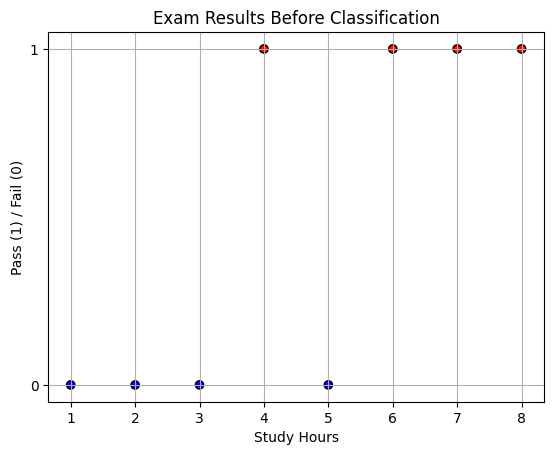

In [9]:
#Row data 
import numpy as np
import matplotlib.pyplot as plt

# Study hours vs pass (1) / fail (0)
X = np.array([1, 2, 3, 4, 5, 6, 7, 8]).reshape(-1, 1)
y = np.array([0, 0, 0, 1, 0, 1, 1, 1])

plt.scatter(X, y, c=y, cmap='bwr', edgecolors='k')
plt.xlabel('Study Hours')
plt.ylabel('Pass (1) / Fail (0)')
plt.title('Exam Results Before Classification')
plt.yticks([0, 1])
plt.grid(True)
plt.show()

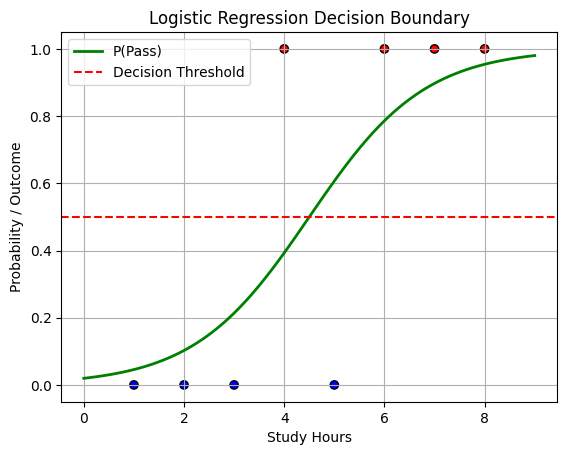

In [11]:
#Applying Logistic Regression
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X, y)

# Get predicted probabilities
X_test = np.linspace(0, 9, 100).reshape(-1, 1)
y_proba = model.predict_proba(X_test)[:, 1]  # P(Pass)

plt.scatter(X, y, c=y, cmap='bwr', edgecolors='k')
plt.plot(X_test, y_proba, color='green', linewidth=2, label='P(Pass)')
plt.axhline(0.5, color='red', linestyle='--', label='Decision Threshold')
plt.xlabel('Study Hours')
plt.ylabel('Probability / Outcome')
plt.title('Logistic Regression Decision Boundary')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
new_students = np.array([[2.5], [4.5], [6.5]])
print("Pass Probabilities:", model.predict_proba(new_students)[:, 1])
print("Predictions:", model.predict(new_students))

Pass Probabilities: [0.14984944 0.49997349 0.85012354]
Predictions: [0 0 1]


### Binary Classification with Multiple Inputs: Practical Example

Predict whether a customer will purchase a product (1) or not (0) based on:

Age

Income ($1000s)

Time spent on website (minutes)

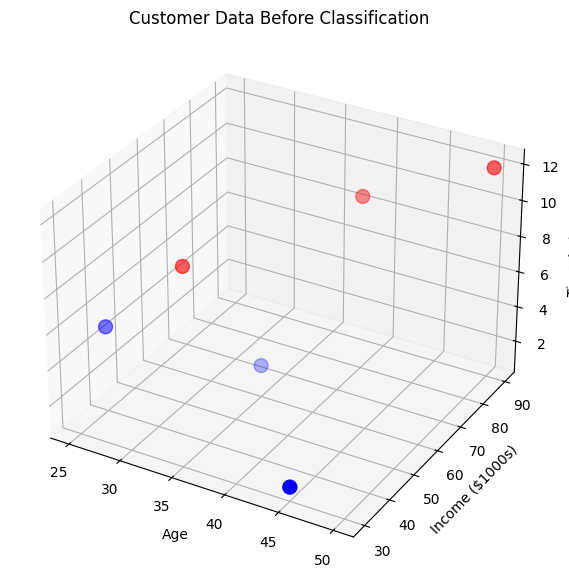

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Sample data: [Age, Income, Time] -> Purchase (0/1)
X = np.array([
    [25, 40, 5],
    [30, 50, 8],
    [35, 60, 2],
    [40, 80, 10],
    [45, 30, 1],
    [50, 90, 12]
])
y = np.array([0, 1, 0, 1, 0, 1])

# 3D Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c=y, cmap='bwr', s=100, depthshade=True)

ax.set_xlabel('Age')
ax.set_ylabel('Income ($1000s)')
ax.set_zlabel('Time (mins)')
ax.set_title('Customer Data Before Classification')
plt.show()

In [15]:
# Applying Logistic Regression with Multiple Features
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train model
model = LogisticRegression()
model.fit(X_scaled, y)

# Coefficients
print("Feature Coefficients:")
print(f"Age: {model.coef_[0][0]:.2f}")
print(f"Income: {model.coef_[0][1]:.2f}")
print(f"Time: {model.coef_[0][2]:.2f}")

Feature Coefficients:
Age: 0.14
Income: 0.52
Time: 1.02


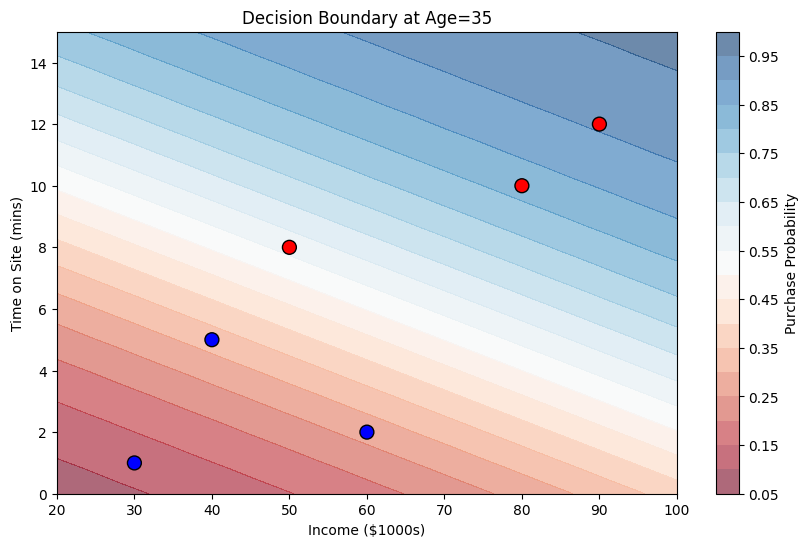

In [16]:
# Create prediction grid
income_range = np.linspace(20, 100, 20)
time_range = np.linspace(0, 15, 20)
xx, yy = np.meshgrid(income_range, time_range)

# Predict for Age=35
fixed_age = 35
grid_data = np.c_[np.full(xx.size, fixed_age), xx.ravel(), yy.ravel()]
grid_data_scaled = scaler.transform(grid_data)
probs = model.predict_proba(grid_data_scaled)[:, 1].reshape(xx.shape)

# Plot
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, probs, levels=20, cmap='RdBu', alpha=0.6)
plt.colorbar(label='Purchase Probability')
plt.scatter(X[:,1], X[:,2], c=y, cmap='bwr', edgecolors='k', s=100)
plt.title(f'Decision Boundary at Age={fixed_age}')
plt.xlabel('Income ($1000s)')
plt.ylabel('Time on Site (mins)')
plt.show()

Here’s your **Naive Bayes Cheat Sheet**, polished to be **interview-ready**, with both **equations and human-readable math** integrated clearly:

---

## ✅ **Naive Bayes Algorithm – Interview Cheat Sheet**

---

### **1. Core Idea**

* A **probabilistic classifier** based on **Bayes' Theorem**, assuming **features are independent** given the class.
* Very fast and effective for high-dimensional data (e.g., text).

---

### **2. Bayes' Theorem – Math + Meaning**

**Formula:**

$$
P(y|X) = \frac{P(X|y) \cdot P(y)}{P(X)}
$$

**Plain version:**
**Posterior = (Likelihood × Prior) / Evidence**

**What it means:**

* **P(y|X)**: Probability the input `X` belongs to class `y` (posterior)
* **P(X|y)**: Likelihood of seeing `X` if class is `y`
* **P(y)**: Prior probability of class `y`
* **P(X)**: Total probability of input `X` (acts as a normalizer)

> ✅ Naive Bayes uses this theorem assuming **each feature in `X` is independent**.

---

### **3. Types of Naive Bayes**

| Type            | Input Type        | Example Use Case                  |
| --------------- | ----------------- | --------------------------------- |
| **Gaussian**    | Continuous values | Iris flower classification        |
| **Multinomial** | Discrete counts   | Text classification (word counts) |
| **Bernoulli**   | Binary features   | Spam detection (word presence)    |

---

### **4. Workflow Example – Spam Detection**

**Training Set:**

| Email Text         | Label |
| ------------------ | ----- |
| "Win money now"    | Spam  |
| "Meeting tomorrow" | Ham   |

#### Step-by-step:

1. **Calculate Prior Probabilities**

   * P(Spam) = 1/2 = 0.5
   * P(Ham) = 1/2 = 0.5

2. **Compute Likelihoods (with Laplace smoothing)**
   Vocabulary size = 2 (words: "win", "money")
   Total words in Spam class = 3

   * P("win"|Spam) = (1 + 1) / (3 + 2) = 0.4
   * P("money"|Spam) = (1 + 1) / (3 + 2) = 0.4

3. **Predict New Email: "win money"**

   ```
   P(Spam | "win money") ∝ 0.5 × 0.4 × 0.4 = 0.08  
   P(Ham | "win money") ∝ 0.5 × 0 × 0 = 0  
   → Predict: Spam ✅
   ```

---

### **5. Pros & Cons**

**✅ Pros:**

* Very fast to train and predict
* Performs well on **text data**
* Works well with **small datasets**

**❌ Cons:**

* Assumes feature independence (rare in real data)
* Poor at estimating real-world probabilities

---

### **6. Python Code Example**

```python
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

# Data
emails = ["win money", "meeting now"]
labels = [1, 0]  # 1 = Spam, 0 = Ham

# Convert text to word count vectors
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(emails)

# Train Naive Bayes model
model = MultinomialNB(alpha=1)  # Laplace smoothing
model.fit(X, labels)

# Predict on new email
print(model.predict(vectorizer.transform(["free money"])))  # Output: [1] → Spam
```

---

### **7. When to Use Naive Bayes**

* Text classification: spam detection, sentiment analysis
* Fast baseline model
* High-dimensional or small datasets

---

### **Quick Visual Summary:**

```
Bayes' Theorem:

P(Class | Features) ∝ P(Class) × P(Feature₁ | Class) × P(Feature₂ | Class) × ...

Example:
P(Spam | "win money") ∝ 0.5 × 0.4 × 0.4 = 0.08
P(Ham | "win money") = 0
→ Predict: Spam ✅
```

---



In [17]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

# Data
emails = ["win money", "meeting now"]
labels = [1, 0]  # 1 = Spam, 0 = Ham

# Convert text to word count vectors
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(emails)

# Train Naive Bayes model
model = MultinomialNB(alpha=1)  # Laplace smoothing
model.fit(X, labels)

# Predict on new email
print(model.predict(vectorizer.transform(["free money"])))  # Output: [1] → Spam


[1]
